# 비지도 학습


***
- **군집** : 비슷한 샘플을 클러스터로 모은다. 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할등에 사용한다.


- **이상치 탐지** : 정상 데이터가 어떻게 보이는지를 학습한다. 그다음 비정상 샘플을 감지하는 데 사용한다.


- **밀도 추정** : 데이터셋 생성 확률 과정의 확률 밀도 함수를 추정한다. 밀도 추정은 이상치 탐지에 널리 사용되며 밀도가 낮은 영역에 놓인 샘플이 이상치일 가능성이 높다.
***


### 군집

- 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업


분류와 마찬가지로 각 샘플은 하나의 그룹에 할당한다(그러나 분류와 달리 군집은 비지도 학습이다.)

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [20]:
data = pd.DataFrame(iris['data'],columns = iris['feature_names'])
data['target'] = iris['target']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


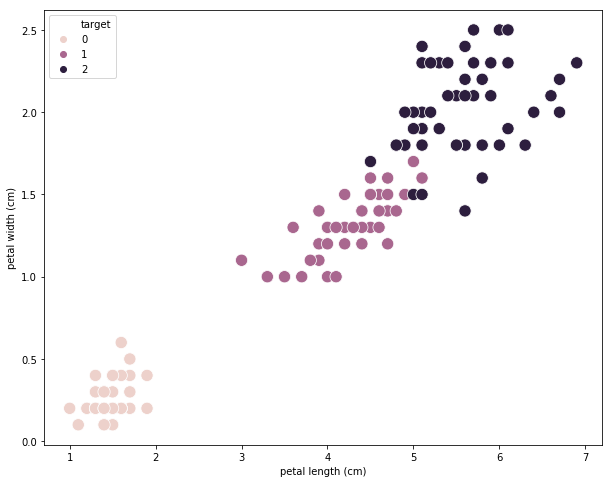

In [51]:
# 레이블이 있는 경우 : 분류
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (10,8))
sns.scatterplot(data['petal length (cm)'],data['petal width (cm)'], hue = data['target'], s = 150)
plt.show()

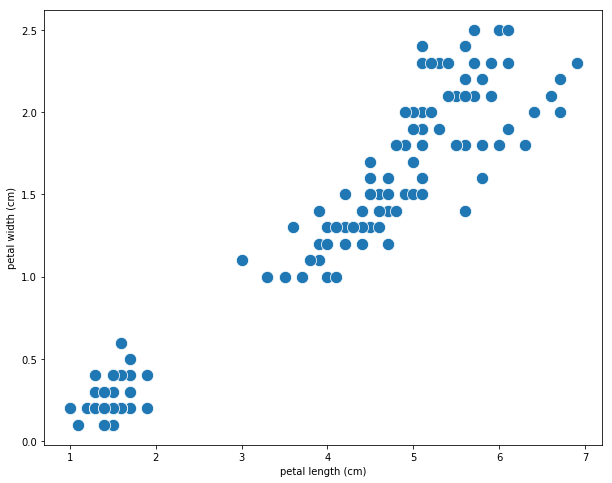

In [52]:
# 레이블이 없는 경우 : 군집
plt.figure(figsize= (10,8))
sns.scatterplot(data['petal length (cm)'],data['petal width (cm)'], s = 150)
plt.show()

In [80]:
data = data[data.columns.difference(['target'])]
target = iris['target']

In [81]:
# 가우시안 혼합 모델을 사용한 클러스터 나누기
from sklearn.mixture import GaussianMixture

In [82]:
y_pred = GaussianMixture(n_components = 3, random_state = 42).fit(data).predict(data)

In [83]:
# mode(최빈값) 사용을 위한 stats 호출
from scipy import stats

# mapping dict 생성
mapping = {}
# 
for class_id in np.unique(target) :
    mode, _ = stats.mode(y_pred[target == class_id])
    mapping[mode[0]] = class_id
mapping

{1: 0, 2: 1, 0: 2}

In [84]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [85]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

In [86]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 군집을 사용하는 예시
***
**고객 분류** : 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모은다. ex) 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 추천시스템

**데이터 분석** : 새로운 데이터를 분석할 떄 군집 알고리즘을 실행하고 각 클러스터를 따로 분석함.

**차원 축소 기법** : 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 친화성을 측정할 수 있음.

**이상치 탐지** : 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다. 웹사이트 내 행동을 기반으로 사용자의 클러스터를 만들었다면 초당 웹서버 요청을 비정상적으로 많이 하는 사용자를 감지할 수 있다.(부정 거래 방지 활용)

**준지도 학습** : 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있다.

**검색 엔진** : 데이터베이스에 있는 모든 이미지에 군집 알고리즘을 적용, 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용해 이미지의 클러스터를 찾아 반환
****


## 군집알고리즘 1. K - Means

In [87]:
# 예시 데이터
from sklearn.datasets import make_blobs

In [91]:
# 5개의 클러스터 중심 설정
blob_centers = np.array([[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

# 5개의 클러스터 표준편차 설정
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [93]:
# 샘플 2000개, 클러스터 중심 5개인 데이터, 편차 설정 된 데이터 data, target 분리
X, y= make_blobs(n_samples = 2000, centers = blob_centers,
          cluster_std = blob_std, random_state = 42)

In [94]:
# data
X

array([[-2.78161655,  3.06930337],
       [ 0.9528098 ,  2.83816802],
       [-1.92550972,  1.77175736],
       ...,
       [ 0.45543698,  1.63539198],
       [-2.93171319,  2.87760279],
       [-2.803323  ,  1.77918831]])

In [95]:
# target
y

array([3, 0, 1, ..., 0, 3, 2])

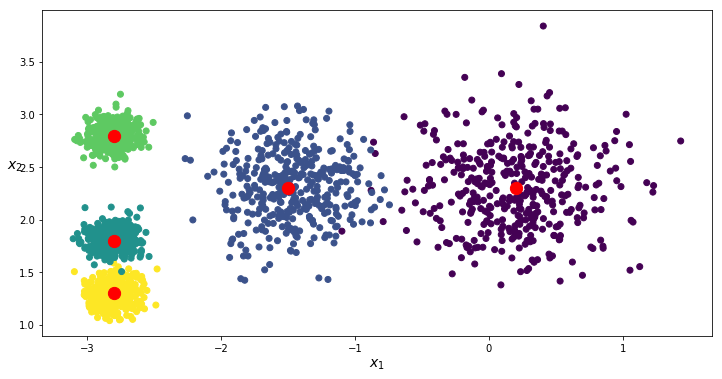

In [153]:
# 데이터 시각화
plt.figure(figsize = (12,6))
plt.scatter(X[:,0],X[:,1], c = y)
plt.xlabel("$x_1$", fontsize = 14)
plt.ylabel("$x_2$", fontsize = 14,rotation  = 0)
plt.show()

In [124]:
# 훈련
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k) # n_clusters의 기본값은 8
# X 분류
y_pred = kmeans.fit_predict(X)

In [125]:
# 5개의 클러스터 중 하나에 할당됨
# 알고리즘이 샘플에 할당한 클러스터의 인덱스
y_pred

array([4, 1, 2, ..., 1, 4, 3])

In [148]:
# 5개의 클러스터의 중심
kmeans_center = kmeans.cluster_centers_
kmeans_center

array([[-2.79244799,  1.2973862 ],
       [ 0.20925539,  2.30351618],
       [-1.4453407 ,  2.32051326],
       [-2.80372723,  1.80873739],
       [-2.79846237,  2.80004584]])

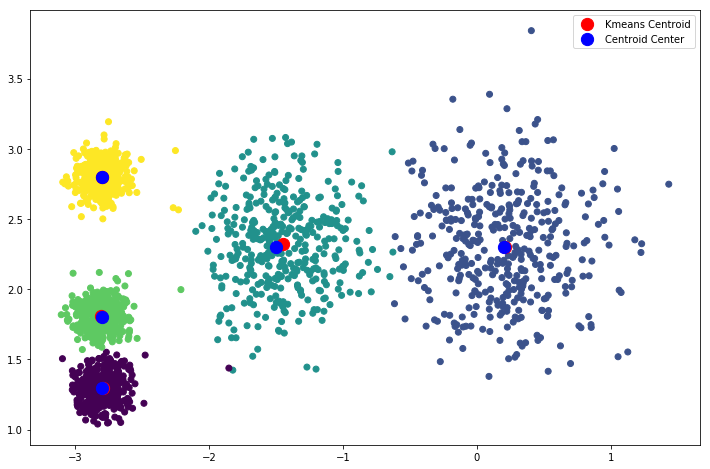

In [154]:
# 클러스터 중심 시각화
plt.figure(figsize = (12,8))
# y_pred로 구분한 결과
plt.scatter(X[:,0],X[:,1], c = y_pred)
plt.scatter(kmeans_center[:,0],kmeans_center[:,1], label = "Kmeans Centroid", s = 150, c = "r")
plt.scatter(blob_centers[:,0],blob_centers[:,1], c = 'b', s = 150, label = "Centroid Center")
plt.legend()
plt.show()

In [147]:
# 새로운 샘플을 kmeans 모델에 대입한 결과 가장 가까운 1번 클러스터에 할당되었다.
x_new = np.array([[1,2]])
kmeans.predict(x_new)

array([1])

In [149]:
# 샘플과 각 클러스터 사이의 거리
kmeans.transform(x_new)

array([[3.8569843 , 0.84699416, 2.46625625, 3.80853282, 3.88180238]])

## hard clustering

- 하나의 데이터가 정확히 하나의 군집에 할당하는 것

## soft clustering

- 하나의 데이터가 다수의 군집에 할당하는 것

kmeans 알고리즘은 센트로이드를 랜덤하게 초기 평균값에서 